# Task2 数据读取与数据分析

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
import re
from scipy.stats import f_oneway
%matplotlib inline

## 1.读取数据

In [3]:
train_df = pd.read_csv('train_set.csv', sep='\t')

In [7]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}

## 2.观察文本长度分布情况

In [14]:
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split(' ')))
print(train_df['text_len'].describe())

count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


### 2.1 文本长度分布

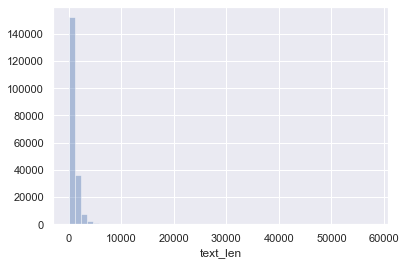

In [21]:
sns.set()
sns.distplot(train_df['text_len'], kde=False)

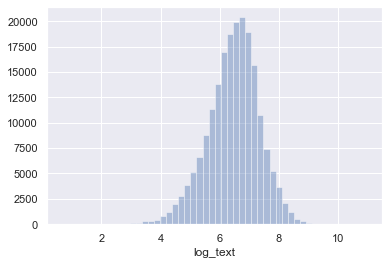

In [28]:
# 对长度取对数，基本符合正态分布
train_df['log_text'] =  train_df['text_len'].apply(lambda x: math.log(x))
sns.distplot(train_df['log_text'], kde=False)

### 2.2 不同类别的文本长度

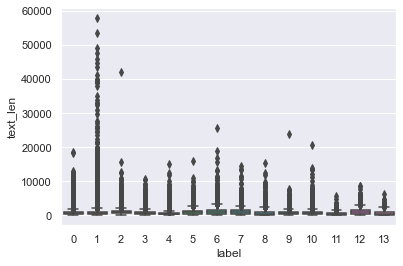

In [22]:
sns.boxplot(x="label", y="text_len", data=train_df)

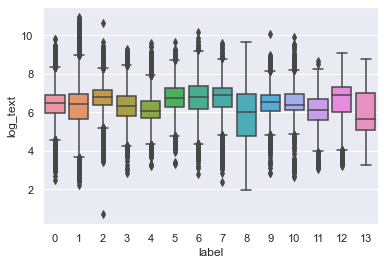

In [29]:
sns.boxplot(x="label", y="log_text", data=train_df)

In [81]:
anova_list = []
for i in train_df.label.unique():
    x =  train_df[train_df.label==i]['log_text']
    anova_list.append(x)
F, p = f_oneway(   *anova_list )
print(F, p)

1127.834020347454 0.0


### 2.3 结论
 - 从文本长度上看，明显右偏，平均文本长度907个词，最长的文本有5万多个次，而最短的文本只有2个词 <br />
 - 从boxplot上来看，那些超长文本全部为类别1，即股票类的新闻 <br />
 - 从方差分析来看，不同类别的长度差异显著，可能可以作为一个特征

## 3. 类别均衡情况

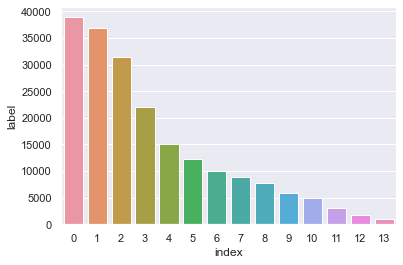

In [92]:
cate = pd.DataFrame(train_df['label'].value_counts()).reset_index()
sns.barplot(x ='index',y='label', data=cate)

类别的编码已经是按照每个类别数量的多少排序了，其中科技类新闻数量最多，星座类新闻数量最少

## 4. 字符分布统计

In [12]:
from collections import Counter
all_lines = ' '.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:d[1], reverse = True)

print(len(word_count))
print(word_count[0])
print(word_count[-1])

6869
('3750', 7482224)
('3133', 1)


训练集中总共6869个词，其中‘’3750‘’出现频率最高748万次，极有可能是标点，“3133”仅出现1次

In [13]:
train_df['text_unique'] = train_df['text'].apply(lambda x: ' '.join(list(set(x.split(' ')))))
all_lines = ' '.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

print(word_count[0])
print(word_count[1])
print(word_count[2])

('3750', 197997)
('900', 197653)
('648', 191975)


在20万条训练样本中，有部分词出现了几乎所有语句中，极有可能是标点

## task2 作业

1.假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？


In [130]:
train_df['sentence_num'] =  train['text'].apply(lambda x: len(x.replace('3750','!').replace('900','!').replace('648','!').split('!')) )

In [131]:
train_df.sentence_num.describe()

count    20000.000000
mean        80.899350
std         88.093774
min          1.000000
25%         29.000000
50%         57.000000
75%        103.000000
max       1659.000000
Name: sentence_num, dtype: float64

作业1答案：平均每篇新闻81个句子，最长的有1659句

2.统计每类新闻中出现次数对多的字符

In [158]:
train_group = train_df.groupby('label')['text'].apply(' '.join).reset_index()

In [159]:
train_group['text'].apply(lambda x: Counter(x.replace(' 3750','').replace(' 900','').replace(' 648','').split(' ')).most_common(1)[0][0])

0     3370
1     3370
2     7399
3     6122
4     4411
5     6122
6     6248
7     3370
8     6122
9     7328
10    3370
11    4939
12    4464
13    4939
Name: text, dtype: object

作业2答案：去除标点符号后，每个类别的惯用词由上表展现